In [21]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import missingno
import seaborn as sns

In [3]:
train_df = pd.read_csv(r"C:\Users\Tringapps\Downloads\housing.csv")
test_df = pd.read_csv(r"C:\Users\Tringapps\Downloads\housing_test.csv")
model = LinearRegression()


In [4]:
train_df=train_df.fillna(train_df.quantile(0.5))
test_df=test_df.fillna(test_df.quantile(0.5))

In [5]:
# df1 = df[(df['median_house_value']>df.median_house_value.quantile(0.04))&(df['median_house_value']<df.median_house_value.quantile(0.96))]
filtered_df=train_df.drop(['households','total_rooms','ocean_proximity'],axis='columns')
print("Filtered Training Data")
filtered_df.head()


Filtered Training Data


,longitude,latitude,housing_median_age,total_bedrooms,population,median_income,median_house_value
0,-122.23,37.88,41.0,129.0,322.0,8.3252,452600.0
1,-122.22,37.86,21.0,1106.0,2401.0,8.3014,358500.0
2,-122.24,37.85,52.0,190.0,496.0,7.2574,352100.0
3,-122.25,37.85,52.0,235.0,558.0,5.6431,341300.0
4,-122.25,37.85,52.0,280.0,565.0,3.8462,342200.0


In [6]:
print("Test Data")
test_df.head()

Test Data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.24,38.00,25,1471,300.0,721,304,2.4688,126800,INLAND
1,-121.23,37.99,38,523,80.0,226,72,5.5693,153100,INLAND
2,-121.23,37.98,27,849,137.0,373,131,5.0362,181300,INLAND
3,-121.20,37.97,39,440,83.0,270,97,6.0582,157700,INLAND
4,-121.19,38.04,35,703,117.0,290,107,3.2250,177100,INLAND


In [7]:
list(train_df.columns)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [8]:
train_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<AxesSubplot:>

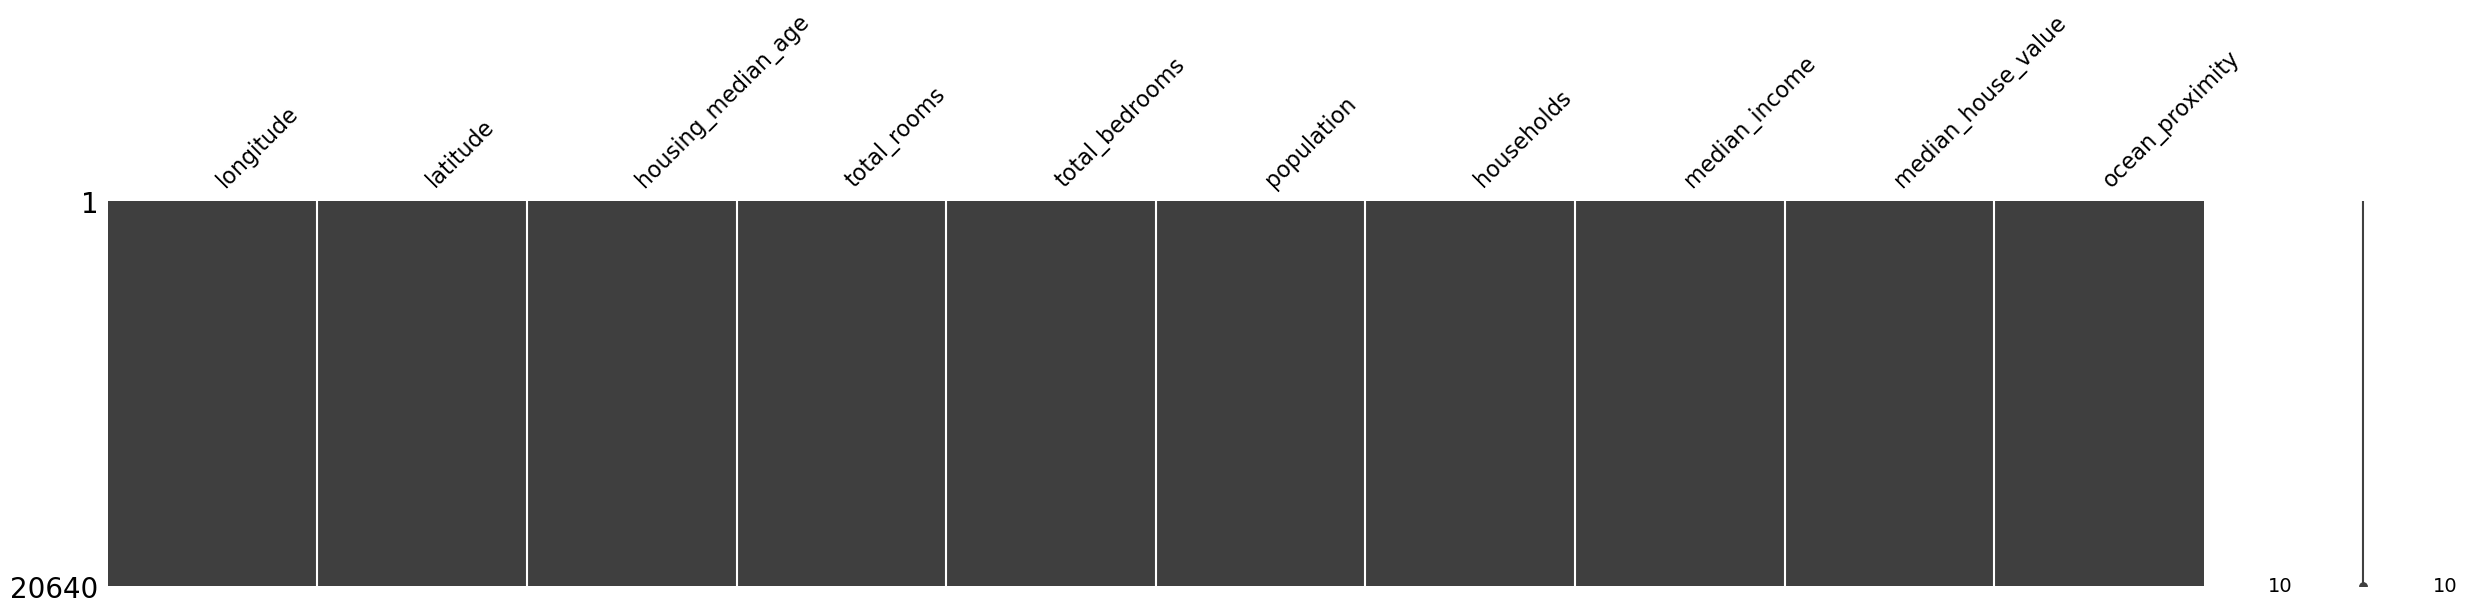

In [9]:
#Plot graphic of missing
import missingno
missingno.matrix(train_df, figsize = (30,5))

<AxesSubplot:>

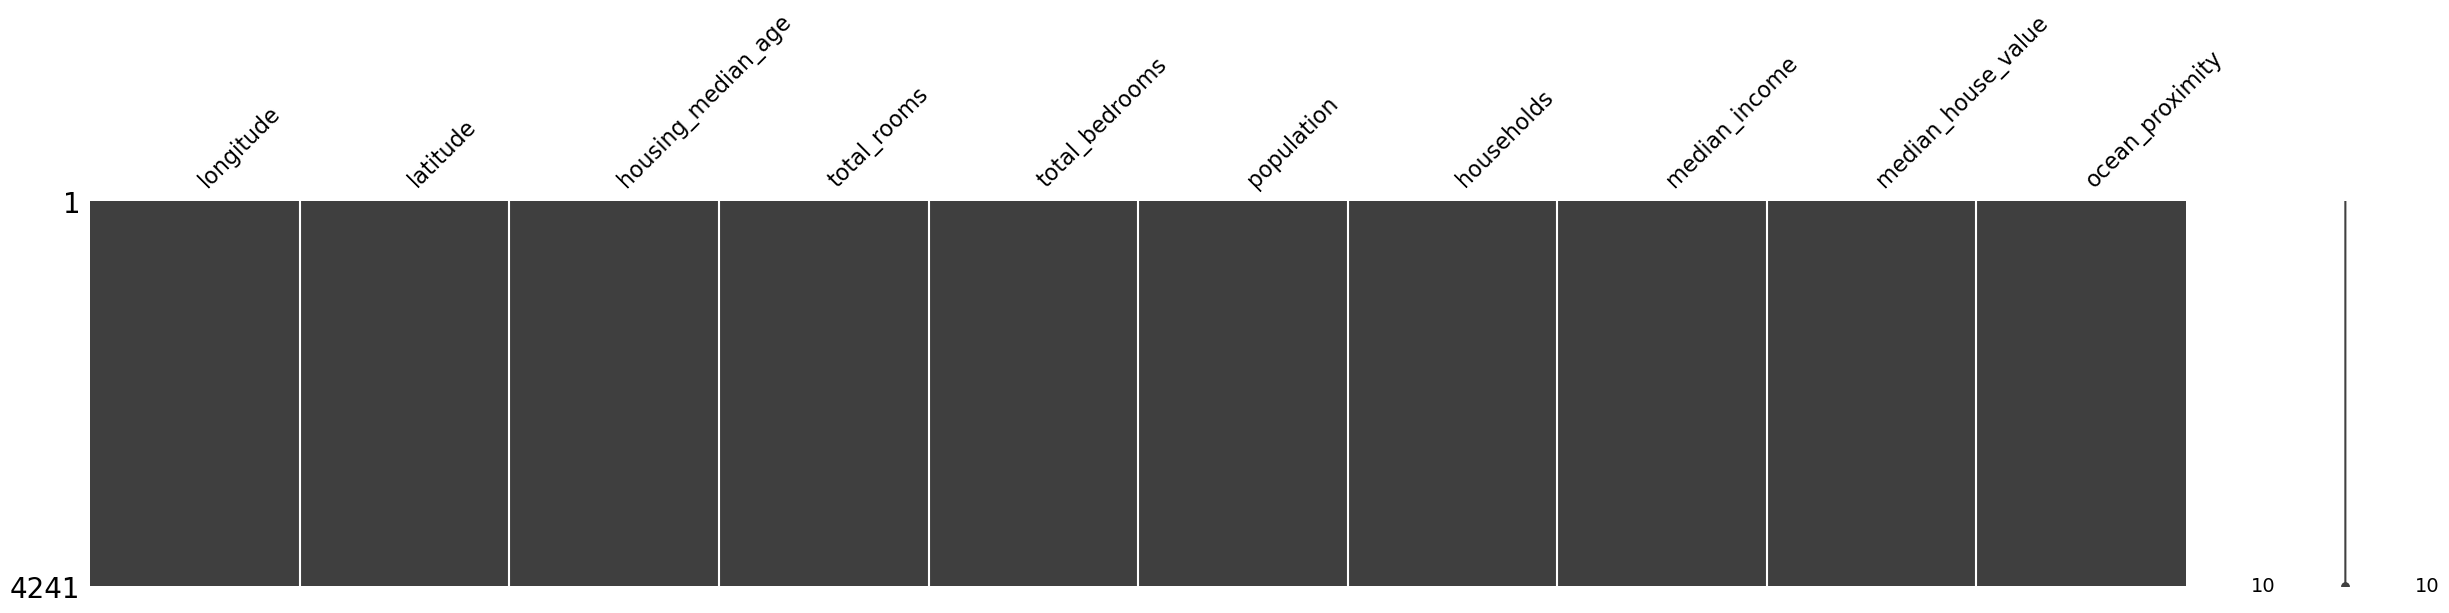

In [10]:
#Plot graphic of missing
import missingno
missingno.matrix(test_df, figsize = (30,5))

In [11]:
#finding number of missing values 
train_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [12]:
#finding number of missing values 
test_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [13]:
dummies = pd.get_dummies(train_df.ocean_proximity)
filtered_df1=[]
filtered_df1 = pd.concat([filtered_df,dummies], axis='columns')
# Filtered the 'NEAR OCEAN','<1H OCEAN','NEAR BAY' by grouping them into one
x = filtered_df1.drop(['median_house_value','NEAR OCEAN','<1H OCEAN','NEAR BAY'],axis='columns')
y = train_df.median_house_value
print("Seperating the data for the Plot")
x.head()

Seperating the data for the Plot


,longitude,latitude,housing_median_age,total_bedrooms,population,median_income,INLAND,ISLAND
0,-122.23,37.88,41.0,129.0,322.0,8.3252,0,0
1,-122.22,37.86,21.0,1106.0,2401.0,8.3014,0,0
2,-122.24,37.85,52.0,190.0,496.0,7.2574,0,0
3,-122.25,37.85,52.0,235.0,558.0,5.6431,0,0
4,-122.25,37.85,52.0,280.0,565.0,3.8462,0,0


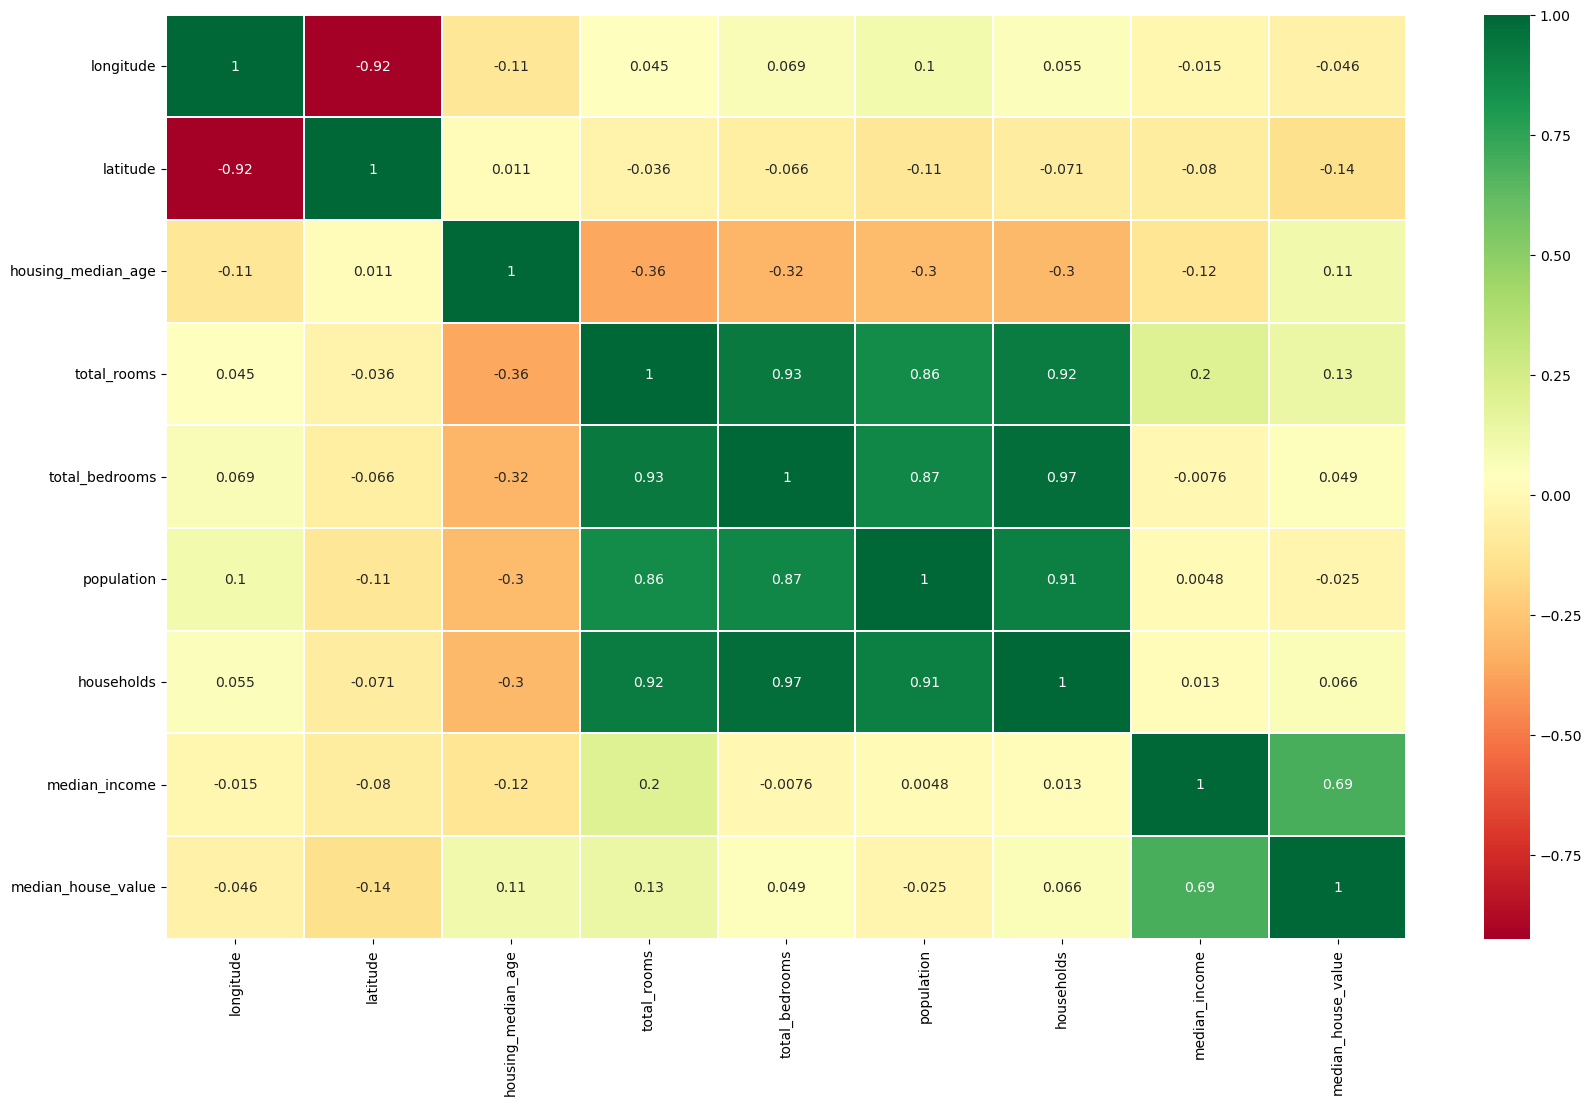

In [14]:
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

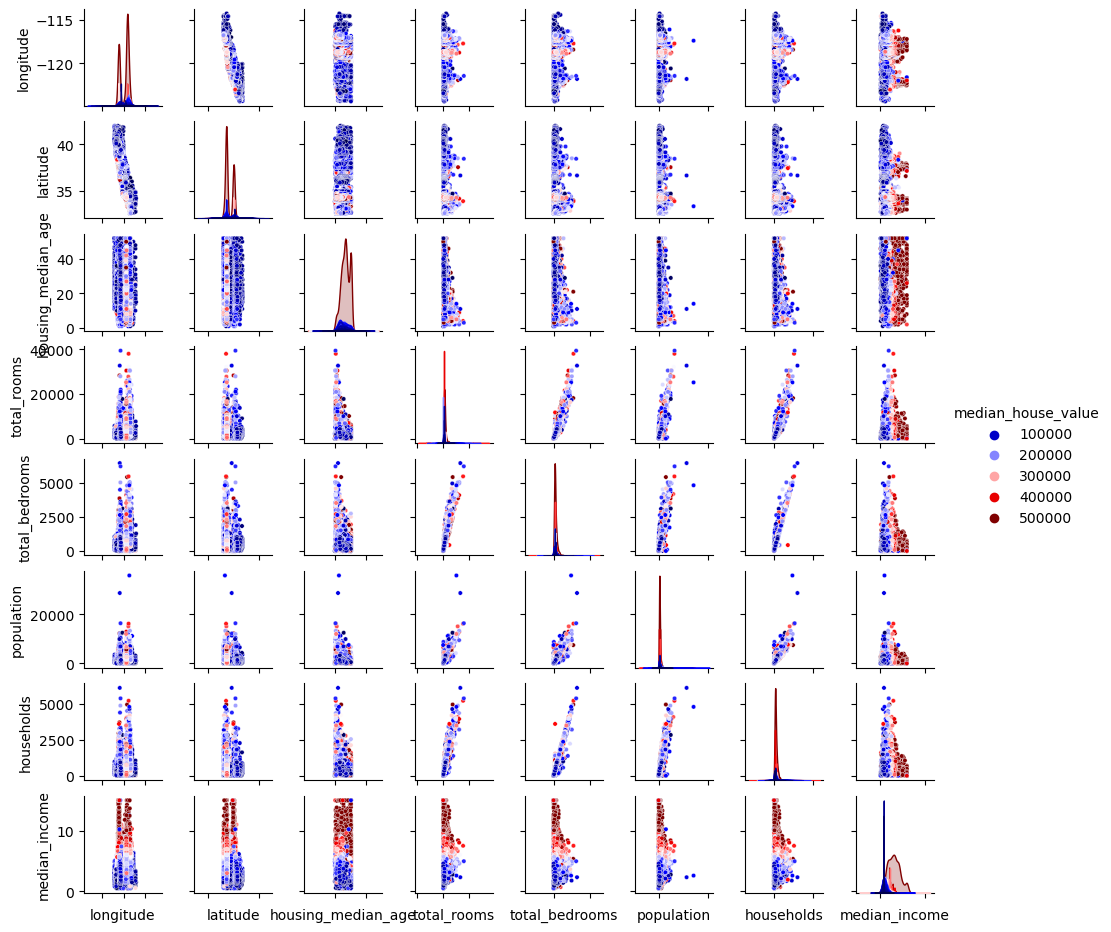

In [17]:

g = sns.pairplot(data=train_df, hue='median_house_value', palette = 'seismic',
                 height=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])
     

In [18]:
model.fit(x,y)

LinearRegression()

In [19]:
model.score(x,y)

0.6423371854256759

In [20]:
model.predict([[-122.23,37.88,41.0,129.0,322.0,8.3252,1,0]])

C:\Users\Tringapps\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([368736.55917526])

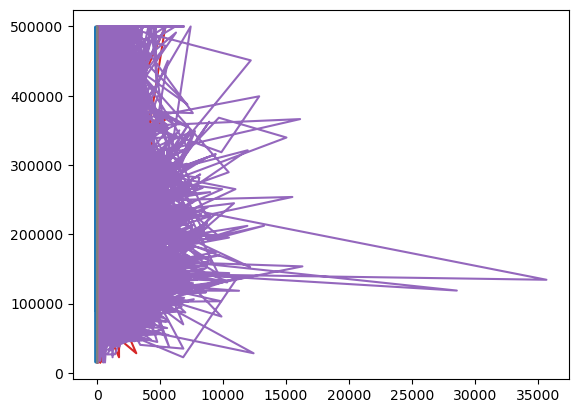

In [24]:
plt.plot(x,y)
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
n_estim=range(100,1000,100)

## Search grid for optimal parameters
param_grid = {"n_estimators" :n_estim}


model_rf = GridSearchCV(model2,param_grid = param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)

model_rf.fit(x,y)



# Best score
print(model_rf.best_score_)

#best estimator
model_rf.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


C:\Users\Tringapps\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


KeyboardInterrupt: 